In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

#import mnist data from keras
from tensorflow.keras.datasets import mnist


In [2]:
#keras stores mnist data as a tuple already split into train and test sets
#loading the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step

In [3]:
print("Shape of training set >", x_train.shape)
print("Shape of test set > ", x_test.shape,"\n")


Shape of training set > (60000, 28, 28)
Shape of test set >  (10000, 28, 28) 



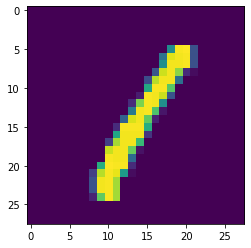

In [5]:
#Viewing a random image
random_image = x_train[3]
plt.imshow(random_image)

In [6]:
#checking on the labels
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# One hot encoding our labels as we have 10 classes
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)


In [8]:
# normalizing our data
x_train,x_test = x_train/255 , x_test/255

In [9]:
# Confirming that our pixel values are between 0 and 1
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Reshaping the image,this is so as to include the number of color channels
# batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(60000,28,28,1)